In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [3]:
gdx_raw = pd.read_csv('/home/dhu/market_data/raw/20260104/GDX-20260104-1767565002.csv', index_col='Date', parse_dates=True)
gld_raw = pd.read_csv('/home/dhu/market_data/raw/20260104/GLD-20260104-1767565002.csv', index_col='Date', parse_dates=True)
gdx = gdx_raw
gld = gld_raw

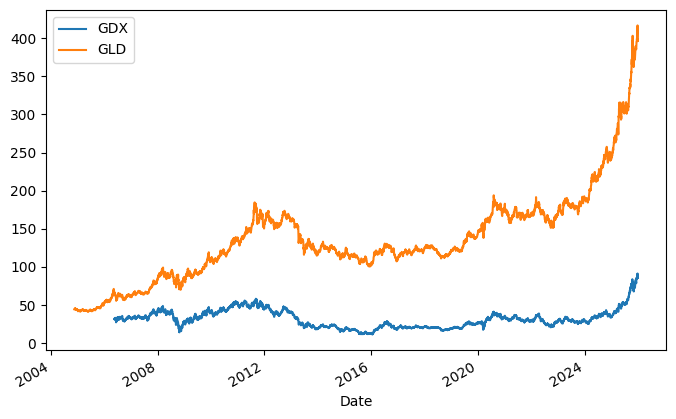

In [4]:
gdx['Adj Close'].plot(label='GDX', figsize=(8, 5))
gld['Adj Close'].plot(label='GLD')
plt.legend()
plt.show();

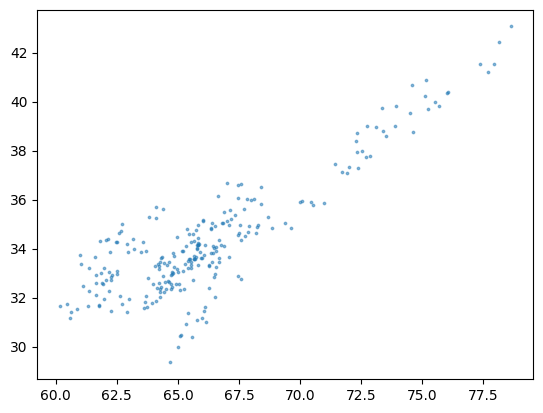

In [41]:
plt.scatter(x=gld_raw['Adj Close'].loc['2006-11-01': '2007-11-01'], y=gdx_raw['Adj Close'].loc['2006-11-01': '2007-11-01'], alpha=0.5, s=3);

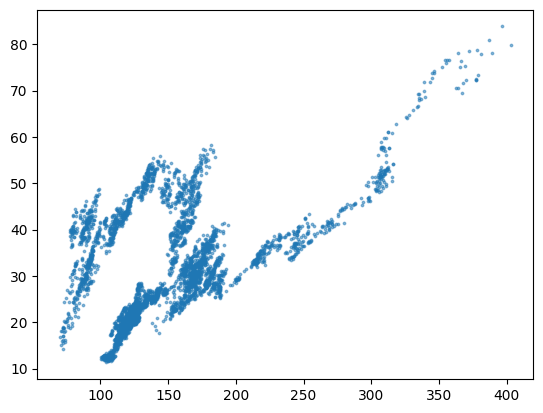

In [42]:
plt.scatter(x=gld_raw['Adj Close'].loc['2007-11-02': '2025-11-01'], y=gdx_raw['Adj Close'].loc['2007-11-02': '2025-11-01'], alpha=0.5, s=3);

In [5]:
gdx['Log Return'] = np.log(gdx['Adj Close'] / gdx['Adj Close'].shift(1))
gld['Log Return'] = np.log(gld['Adj Close'] / gld['Adj Close'].shift(1))

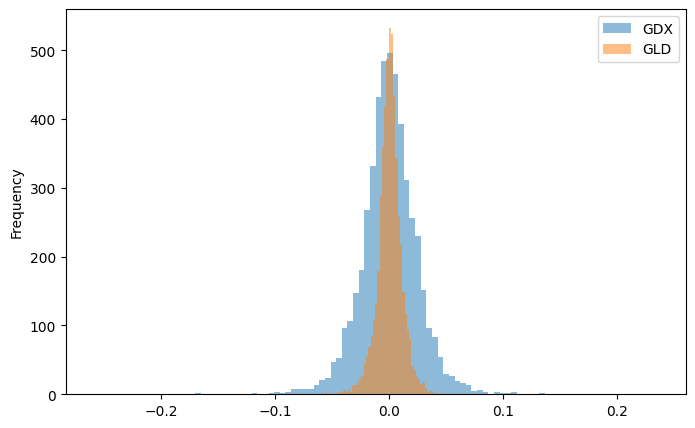

In [6]:
gdx['Log Return'].plot.hist(bins=100, label='GDX', figsize=(8, 5), alpha=0.5)
gld['Log Return'].plot.hist(bins=100, label='GLD', alpha=0.5)
plt.legend()
plt.show();

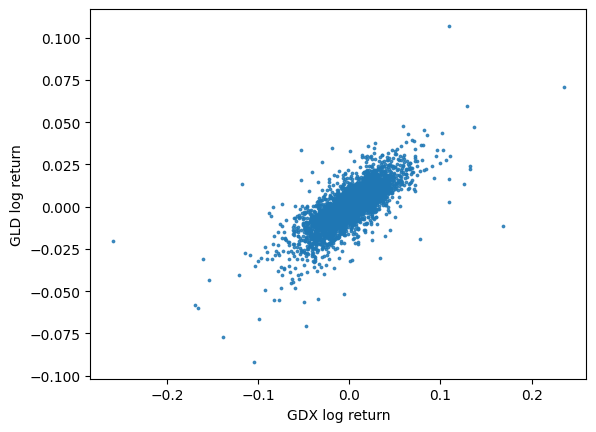

In [7]:
plt.scatter(x=gdx['Log Return'], y=gld['Log Return'], alpha=0.8, s=3)
plt.xlabel('GDX log return')
plt.ylabel('GLD log return')
plt.show();

In [8]:
gdx

,Adj Close,Close,High,Low,Open,Volume,Log Return
Date,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2025-12-24,89.699997,89.699997,90.269997,88.269997,89.800003,14136200.0,-0.006334
2025-12-26,91.290001,91.290001,91.669998,89.610001,90.930000,24708900.0,0.017571
2025-12-29,85.849998,85.849998,87.470001,84.889999,86.930000,39910100.0,-0.061440


In [82]:
gld

,Adj Close,Close,High,Low,Open,Volume,Log Return
Date,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2025-12-24,411.929993,411.929993,412.630005,408.829987,412.250000,6718400.0,-0.004143
2025-12-26,416.739990,416.739990,418.450012,414.750000,416.480011,10476200.0,0.011609
2025-12-29,398.600006,398.600006,403.760010,395.329987,403.660004,20679200.0,-0.044504


In [9]:
start_time = max(gdx.dropna().index[0], gld.dropna().index[0])
end_time = min(gdx.dropna().index[-1], gld.dropna().index[-1])

In [14]:
train_start, train_end = start_time, start_time + pd.DateOffset(years=1)

In [22]:
test_start, test_end = train_end + pd.DateOffset(days=1), end_time

In [23]:
start_time, end_time, train_start, train_end, test_start, test_end

(Timestamp('2006-05-23 00:00:00'),
 Timestamp('2025-12-31 00:00:00'),
 Timestamp('2006-05-23 00:00:00'),
 Timestamp('2007-05-23 00:00:00'),
 Timestamp('2007-05-24 00:00:00'),
 Timestamp('2025-12-31 00:00:00'))

In [24]:
gdx_train, gld_train = gdx.loc[train_start:train_end], gld.loc[train_start:train_end]

In [40]:
gdx_test, gld_test = gdx.loc[test_start:test_end], gld.loc[test_start:test_end]

In [26]:
# build a linear model between the prices of GDX and GLD to see if that can be used to create profit
# the coefficient is hedge_ratio
# the spread = GLD - hedge_ratio * GDX
# the model is trained from the first part of the dataset
model = sm.OLS(gld_train['Adj Close'], gdx_train['Adj Close'])

In [35]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Adj Close   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.619e+05
Date:                Wed, 28 Jan 2026   Prob (F-statistic):                        0.00
Time:                        08:52:29   Log-Likelihood:                         -525.35
No. Observations:                 252   AIC:                                      1053.
Df Residuals:                     251   BIC:                                      1056.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Adj Close      1.9164      0.004    511.746      0.000       1.909       1.924
==============================================================================
Omnibus:                        5.723   Durbin-Watson:                   0.184
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.773
Skew:                          -0.370   Prob(JB):                       0.0558
Kurtosis:                       2.947   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
hedge_ratio = results.params['Adj Close']
hedge_ratio

np.float64(1.9163616126084777)

In [58]:
# calculate spread, this is the synthetic instrument we will be trading
spread_train = gld_train['Adj Close'] - hedge_ratio * gdx_train['Adj Close']
spread_test = gld_test['Adj Close'] - hedge_ratio * gdx_test['Adj Close']

(-10.0, 40.0)

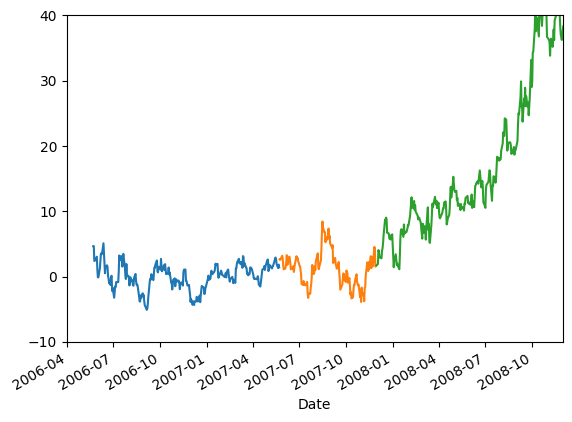

In [99]:
divide_date = pd.to_datetime('2007-11-30')
spread_train.plot()
spread_test.loc[test_start:divide_date].plot()
spread_test.loc[divide_date:].plot()
# spread explodes quickly after 2008
plt.xlim(['2006-04-01', '2008-11-30'])
plt.ylim([-10, 40])

In [110]:
# using a transet array for iloc and a testset array would be nicer
# however the result is wacky since there is no price level linear relationship
# continue the project using a smaller test set for pedagogical reason
trade = pd.concat([gld['Adj Close'].loc[train_start:test_end], gdx['Adj Close'].loc[train_start:test_end]], axis=1)
trade.columns = ['GLD_close', 'GDX_close']
trade

,GLD_close,GDX_close
Date,,
2006-05-23,66.379997,32.213970
2006-05-24,64.059998,30.991945
2006-05-25,64.699997,32.519478
2006-05-26,65.099998,32.714661
2006-05-30,65.110001,32.392178
...,...,...
2025-12-24,411.929993,89.699997
2025-12-26,416.739990,91.290001
2025-12-29,398.600006,85.849998


In [111]:
spread = trade['GLD_close'] - hedge_ratio * trade['GDX_close']
spread

Date
2006-05-23      4.646381
2006-05-24      4.668223
2006-05-25      2.380918
2006-05-26      2.406879
2006-05-30      3.034875
                 ...    
2025-12-24    240.032362
2025-12-26    241.795337
2025-12-29    234.080365
2025-12-30    232.473179
2025-12-31    231.943668
Length: 4934, dtype: float64

In [109]:
spread_mean, spread_std = spread_train.mean(), spread_train.std()
spread_mean, spread_std

(np.float64(0.05222946394014958), np.float64(1.9491538471834085))

In [112]:
trade['z_score'] = (spread - spread_mean) / spread_std

In [113]:
trade

,GLD_close,GDX_close,z_score
Date,,,
2006-05-23,66.379997,32.213970,2.356998
2006-05-24,64.059998,30.991945,2.368204
2006-05-25,64.699997,32.519478,1.194718
2006-05-26,65.099998,32.714661,1.208037
2006-05-30,65.110001,32.392178,1.530226
...,...,...,...
2025-12-24,411.929993,89.699997,123.120159
2025-12-26,416.739990,91.290001,124.024642
2025-12-29,398.600006,85.849998,120.066528


In [116]:
trade['GLD_long'] = 0
trade['GDX_long'] = 0
trade['GLD_short'] = 0 # for shorting the spread
trade['GDX_short'] = 0 # for shorting the spread

In [119]:
# when z >= 2, enter short position, stay in the short position until it goes back below 1
# when z <= -2, enter long position, stay in the long position until it goes back above -1 
trade.loc[trade['z_score'] >= 2, ['GLD_short', 'GDX_short']] = [-1, 1] # short GLD, long GDX => short spread
trade.loc[trade['z_score'] <= -2, ['GLD_long', 'GDX_long']] = [1, -1] # long GLD, short GDX => long spread 
trade.loc[trade['z_score'] <= 1, ['GLD_short', 'GDX_short']] = 0 # exit short spread 
trade.loc[trade['z_score'] >= -1, ['GLD_long', 'GDX_long']] = 0 # exit long spread

In [122]:
trade.ffill(inplace=True) # existing positions are carried forward unless there is a need to change
# very much research style

In [124]:
# just a demo
df = pd.DataFrame({'z_score': [-3, -2, -2, -1.5, -1.2, -1, -0.9, -1.5]})

In [125]:
df

,z_score
0,-3.0
1,-2.0
2,-2.0
3,-1.5
4,-1.2
5,-1.0
6,-0.9
7,-1.5


In [126]:
df.loc[df['z_score'] <= -2, 'long_pos'] = 1
df.loc[df['z_score'] >= -1, 'long_pos'] = 0

In [127]:
df

,z_score,long_pos
0,-3.0,1.0
1,-2.0,1.0
2,-2.0,1.0
3,-1.5,NaN
4,-1.2,NaN
5,-1.0,0.0
6,-0.9,0.0
7,-1.5,NaN


In [128]:
df.ffill(inplace=True)

In [129]:
df # first -1.5 long, second -1.5 no position

,z_score,long_pos
0,-3.0,1.0
1,-2.0,1.0
2,-2.0,1.0
3,-1.5,1.0
4,-1.2,1.0
5,-1.0,0.0
6,-0.9,0.0
7,-1.5,0.0
